# Compute several characteristics of a detector network
## Localization and polarization reconstruction

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pyburst as pb
import pyburst.detectors, pyburst.cbc, pyburst.timefreq, pyburst.skymaps, pyburst.utils

### Plotting defaults

In [2]:
%matplotlib notebook

plt.rcParams['figure.figsize'] = [12.0, 6.0]
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 100

plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['figure.titlesize'] = 'medium'

### Define network

In [3]:
detector_names = ['H1', 'L1', 'V1']
detectors = [pb.detectors.Detector(d) for d in detector_names]

In [4]:
time_ref = 1186741856.0 # Arbitrary

In [5]:
coordsystem = pyburst.skymaps.Coordsystem("geographic")
NSIDE = 2**6
skymap = pyburst.skymaps.Skymap(NSIDE, coordsystem)

### Measure angle between [F+, Fx] plane at current and mirror point

In [6]:
angles = []
for s in skymap.grid_points():

    antenna_pattern = np.array([d.antenna_pattern(s, time_ref) for d in detectors])
    antenna_pattern_mirror = np.array([d.antenna_pattern(s.mirror(detectors), time_ref) for d in detectors])

    normal_plane = np.cross(antenna_pattern[:,0],antenna_pattern[:,1])
    normal_plane /= np.linalg.norm(normal_plane)

    normal_mirror = np.cross(antenna_pattern_mirror[:,0],antenna_pattern_mirror[:,1])
    normal_mirror /= np.linalg.norm(normal_mirror)
        
    angles.append(np.degrees(pb.utils.angle_between(normal_plane,normal_mirror)))
    
angles = np.array(angles)

# compute distance to 0 or to 180 deg
angles = np.piecewise(angles, [angles <= 90, angles > 90], [lambda x: x, lambda x: 180-x])

### Plotting

<IPython.core.display.Javascript object>


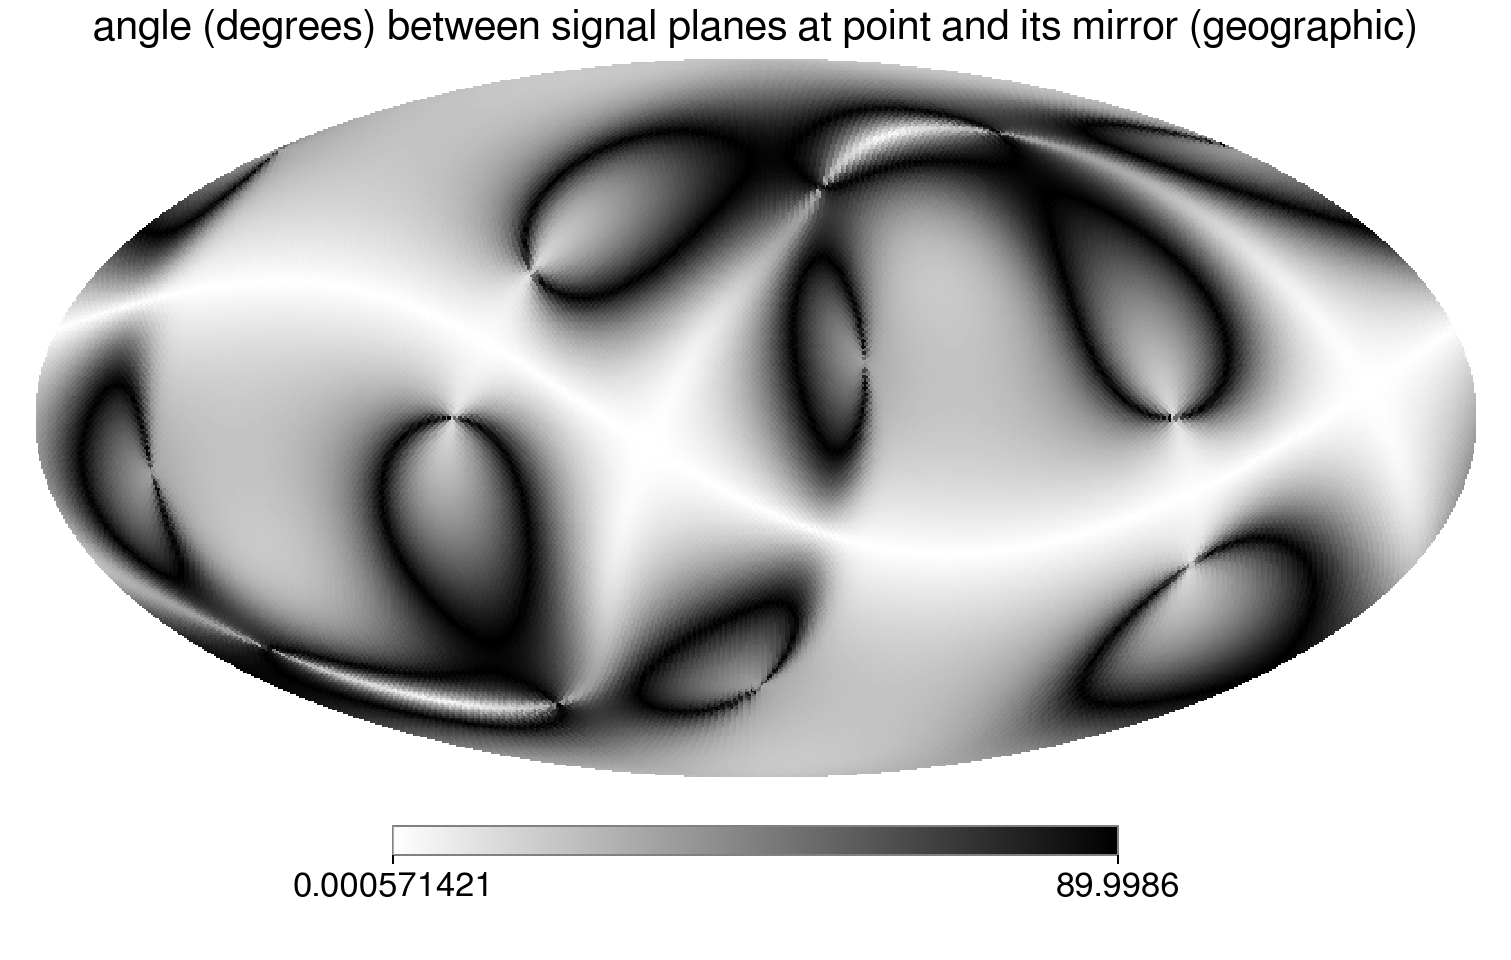

In [7]:
skymap.feed(angles)
skymap.display("angle (degrees) between signal planes at point and its mirror")
plt.show()

### Conditioning number

In [8]:
antenna_patterns = np.moveaxis(np.array([d.antenna_pattern(skymap.grid_points()) for d in detectors]),-1,0)

<IPython.core.display.Javascript object>


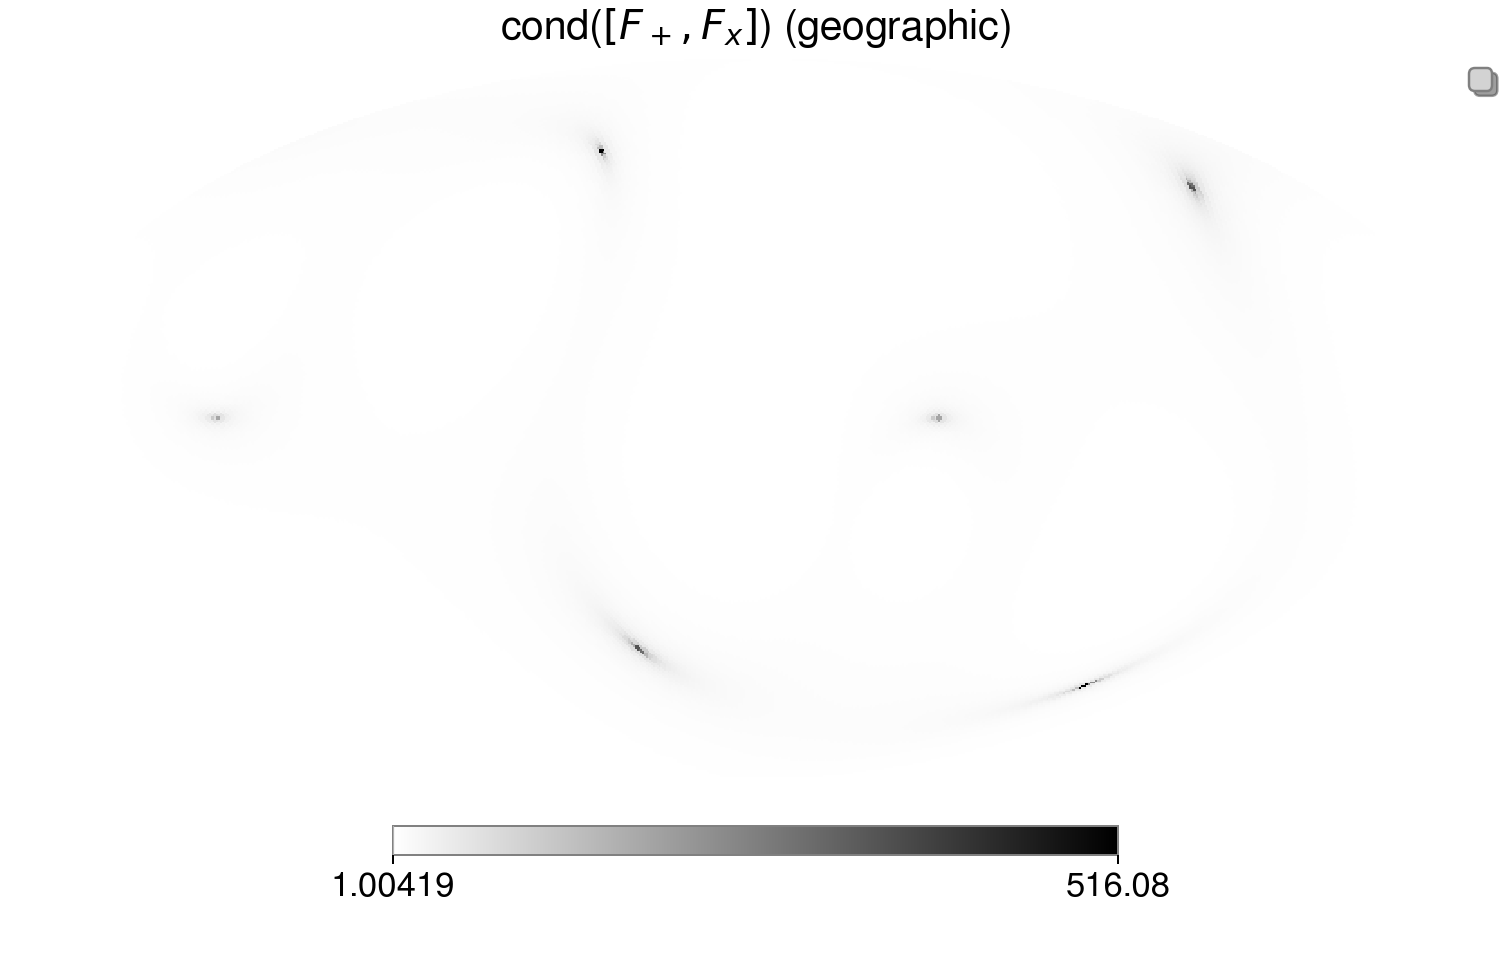

No handles with labels found to put in legend.


In [9]:
skymap.feed(np.linalg.cond(antenna_patterns))
skymap.display("cond($[F_+, F_x]$)")
plt.legend(loc='upper center', bbox_to_anchor=(1, 1),
          ncol=2, fancybox=True, shadow=True, \
          facecolor="lightgray", markerscale = 0.5)
plt.show()

### Smallest singular value

<IPython.core.display.Javascript object>


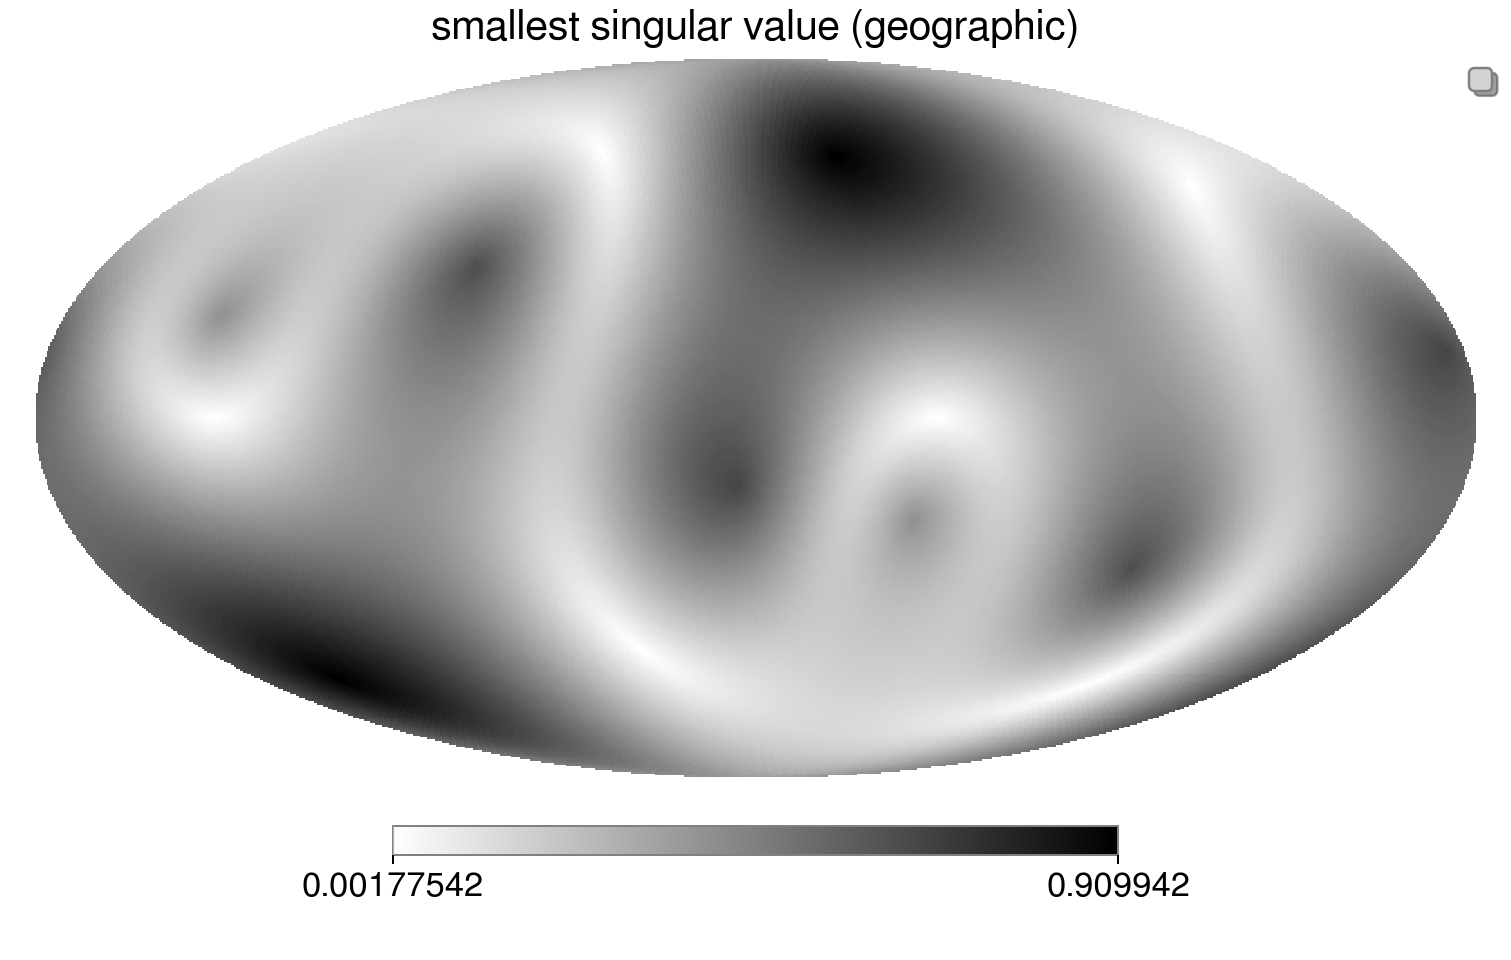

No handles with labels found to put in legend.


In [10]:
skymap.feed(np.linalg.norm(antenna_patterns,axis=(1,2),ord=-2))
skymap.display("smallest singular value")
plt.legend(loc='upper center', bbox_to_anchor=(1, 1),
          ncol=2, fancybox=True, shadow=True, \
          facecolor="lightgray", markerscale = 0.5)
plt.show()